<a href="https://colab.research.google.com/github/Nikhilprasad1010/BikeSharingDemandPrediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Bike Sharing Demand Prediction***

# ***Business Context***

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Data Understanding**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:
Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Dataset loading and Cleanup**

In [1]:
#importing the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bike_df=pd.read_csv('/content/drive/MyDrive/bike sharing prediction/SeoulBikeData.csv', encoding ='latin')

# **EDA**

In [4]:
#Viewing Top 5 Rows & Coloums
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#Viewing Bottom 5 Rows & Coloums
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
print(bike_df.shape)
#There are total 8760 Rows & 14 Coloums in Dataset

(8760, 14)


In [8]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
#print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
#Checking Dublicated Values
len(bike_df[bike_df.duplicated()])
#There are 0 Dublicated Values in Entire Dataset

0

In [13]:
#Changing the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [14]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [16]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [17]:
bike_df.head()
#As seen, Year , Month & Day_name is added to the dataset.

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [19]:
#New Dataset
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [20]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [21]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

Since, Originally the Coloums 'Hour' , 'Month' & 'Weekdays_weekend' were in category datatype, so Lets convert them into the same type as if not done, this could be misleading Later in our Exploration.italicized text

In [22]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [23]:
#now, lets Check type of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

Univariate Analysis

Why do you do univariate analysis?

The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

Analysis of Dependent Variable: What is a dependent variable in data analysis?

we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.

Analysis of categorical variables : Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type.

[Text(0.5, 1.0, 'Count of Rented bikes according to Month ')]

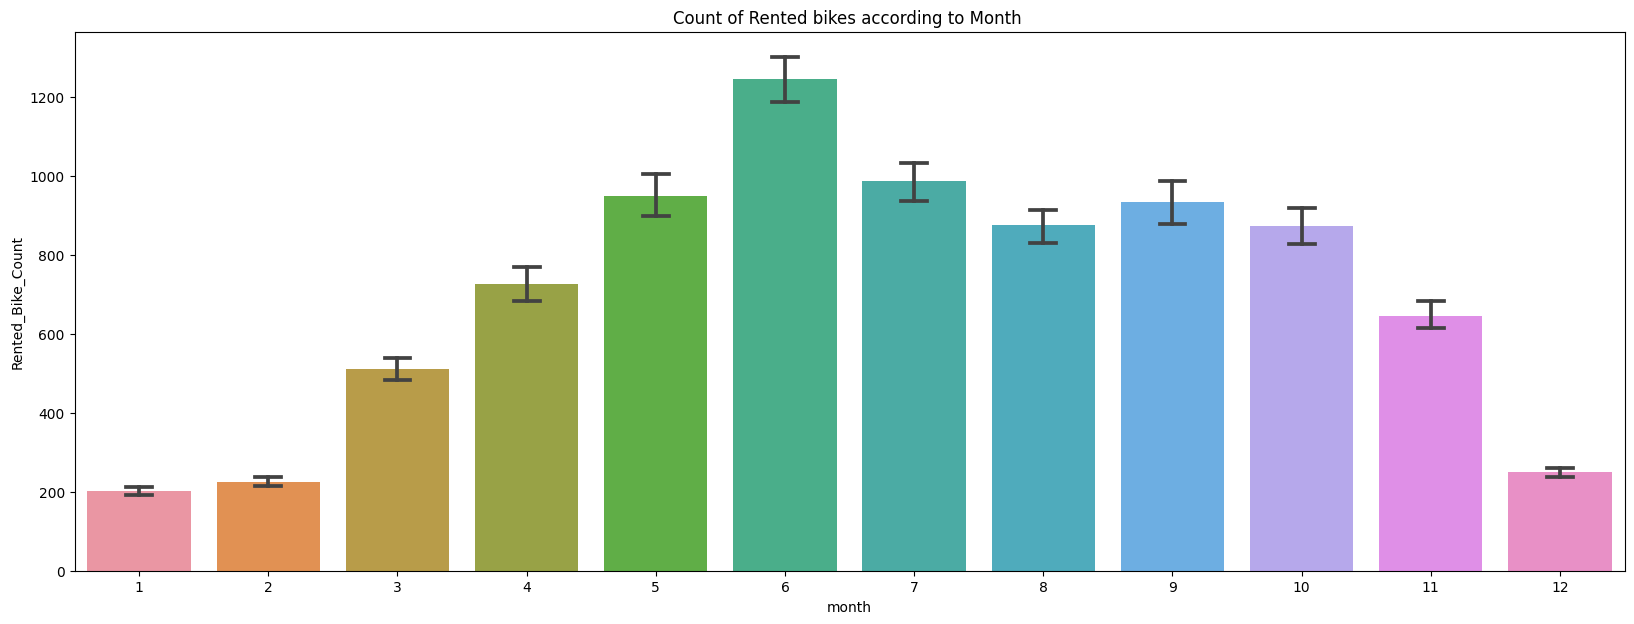

In [24]:
#Count of Rented bike according to Month
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Month ')

Interpretation : As seen, Month 6th ie : June has highest no. of shared bikes , followed by 6th month ie: july. Most of demand is in 5th to 10th month.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

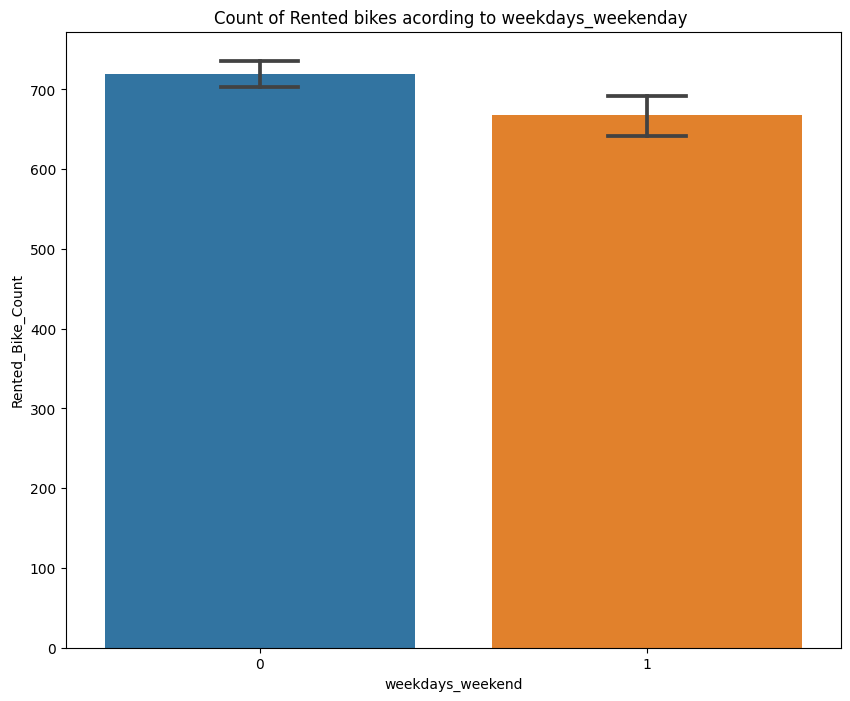

In [25]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

Interpretaion : As seen, Count of rented bike for weekdays are more compared to weekends ie: saturday- Sunday.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

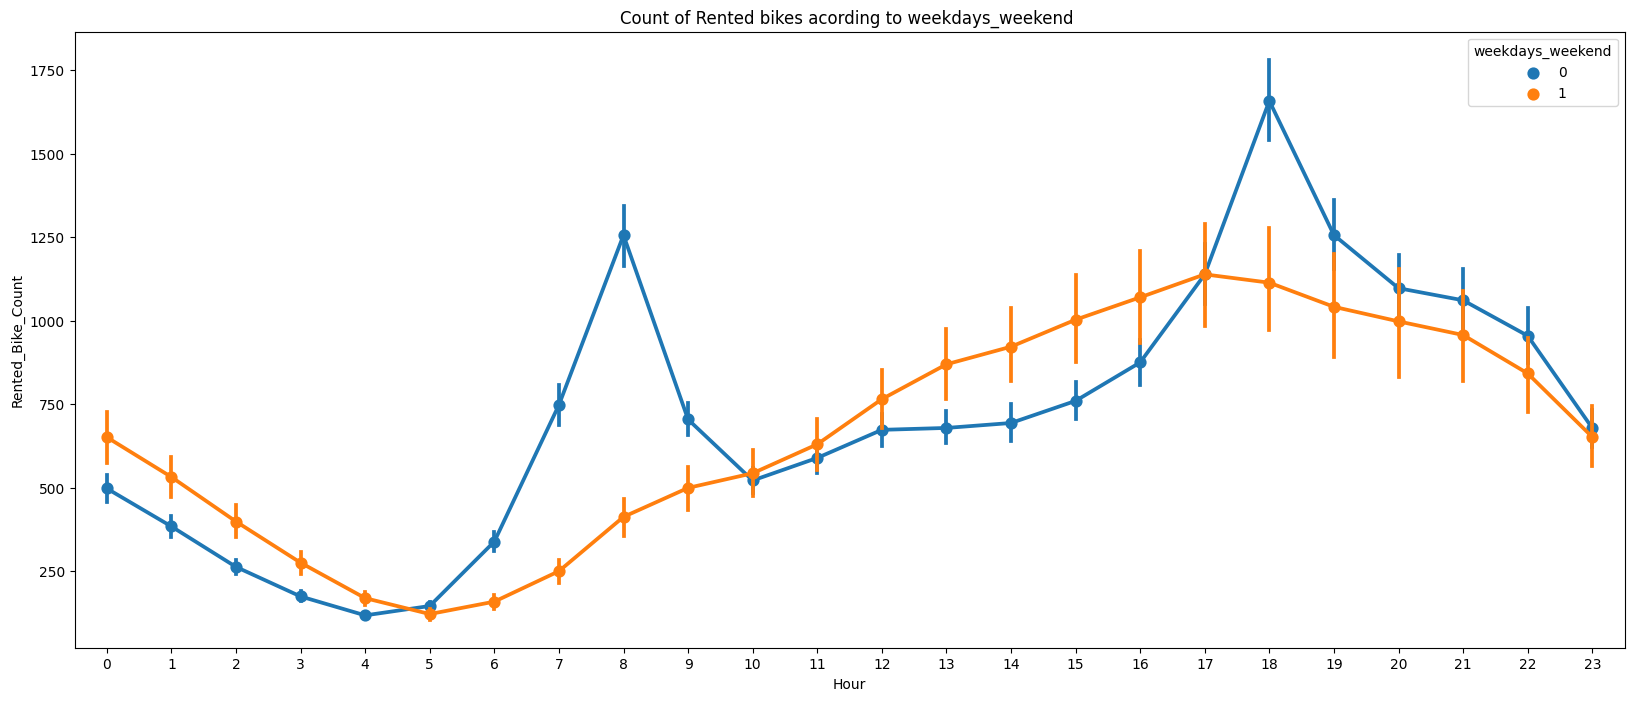

In [26]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

Interpretation : As seen , the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

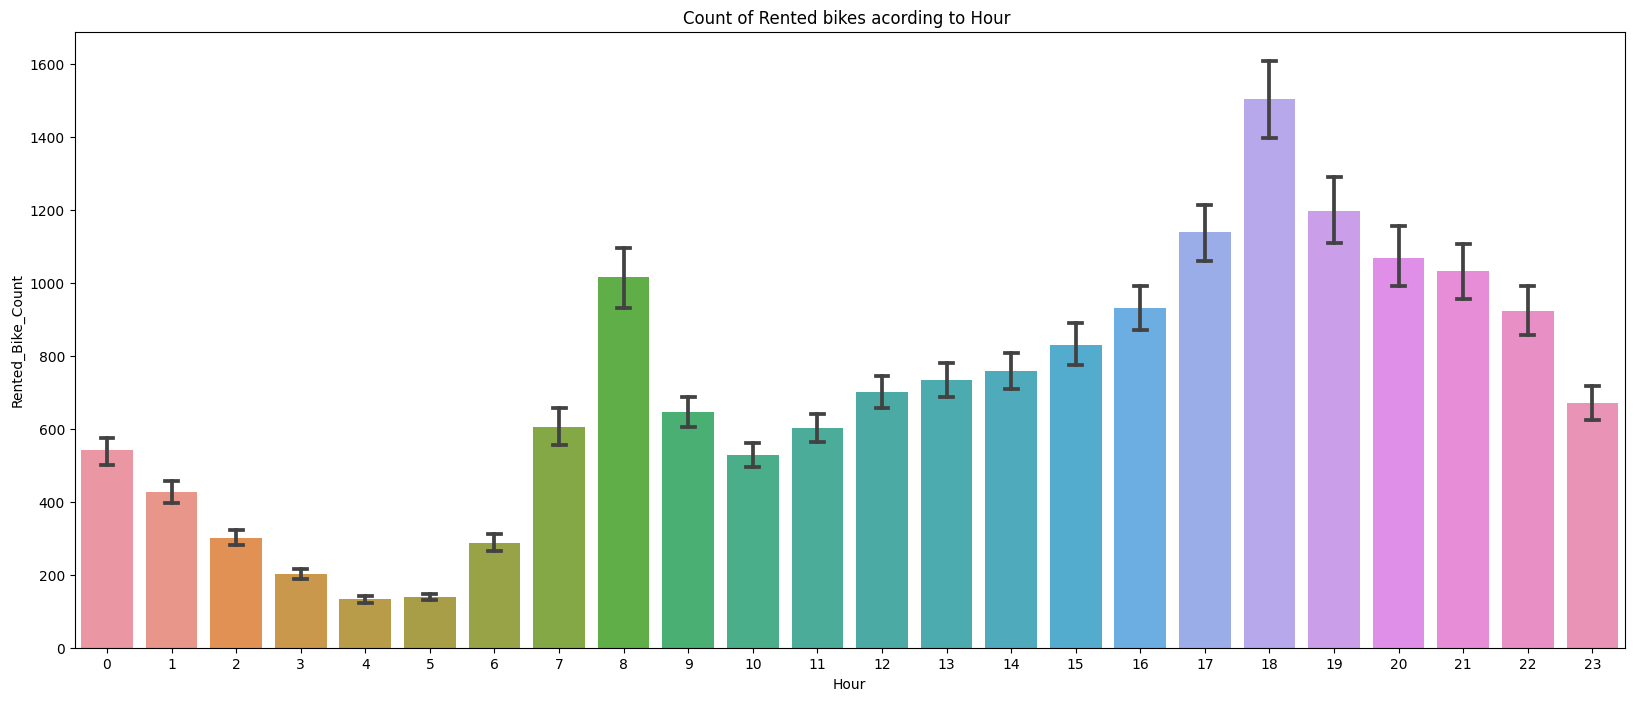

In [27]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

Interpretation : As seen from the above chart, there is increase in demand during morning office hours & eve 5pm to 8pm.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

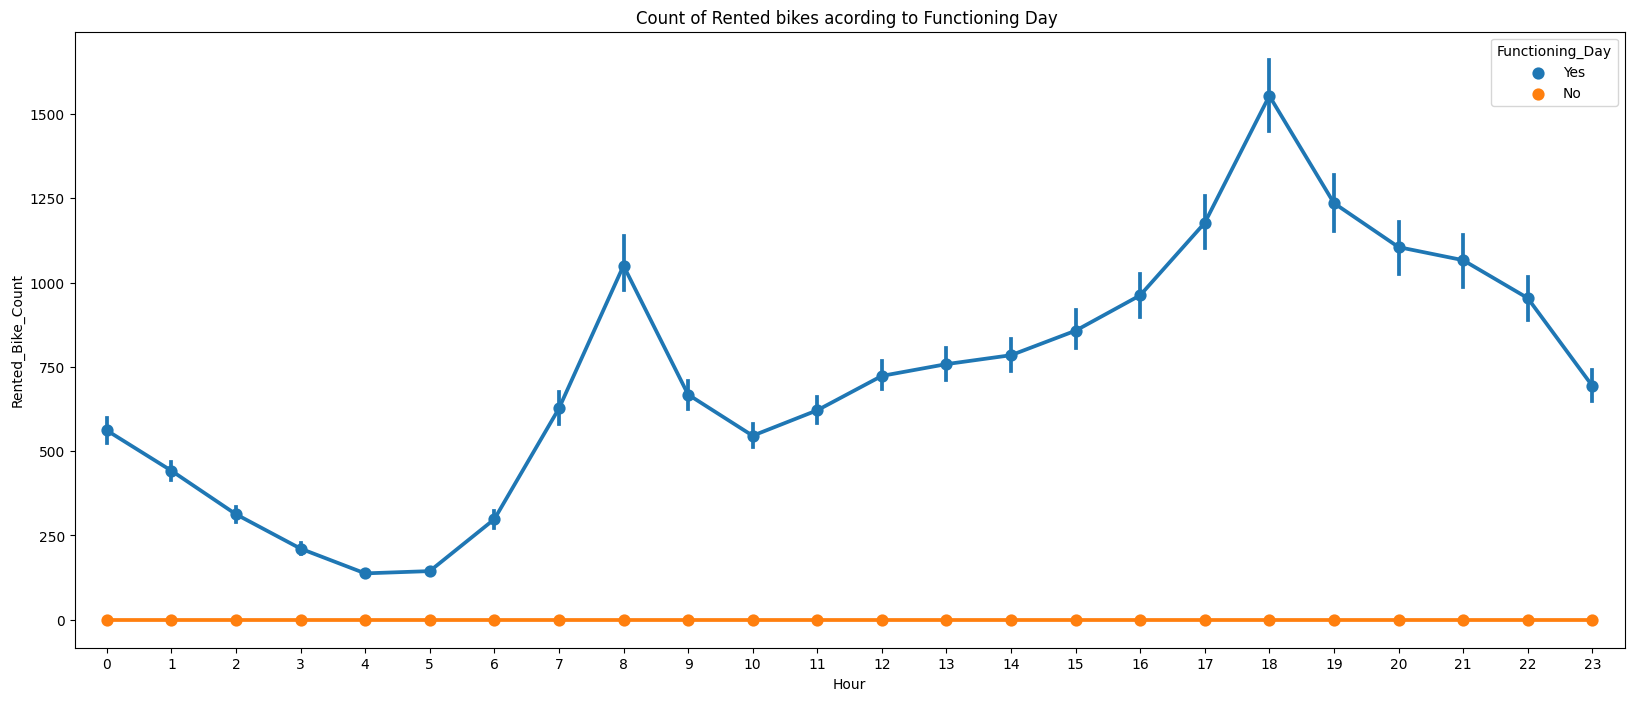

In [28]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

Interpretation : as seen, people dont use rented bikes on functioning days.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

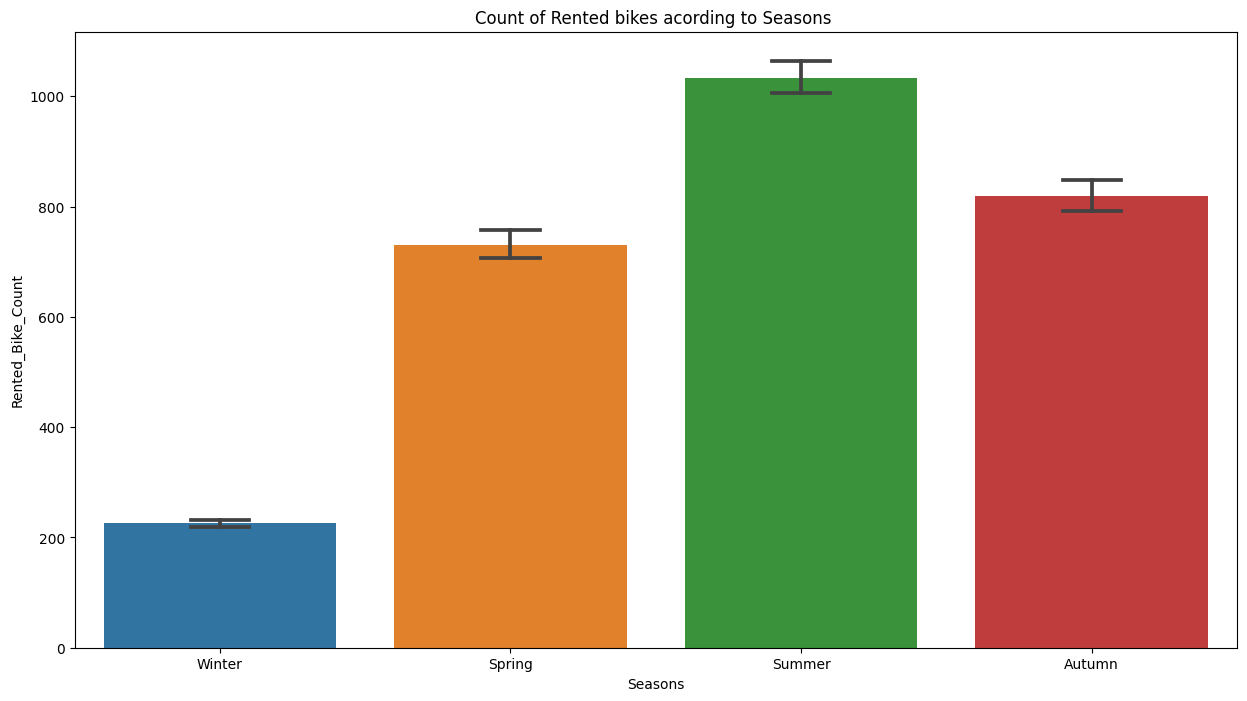

In [29]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

Interpretation : as seen, Summer season has the highest no of demand followed by Autumn & spring. Demand is lowest in Winter season.



[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

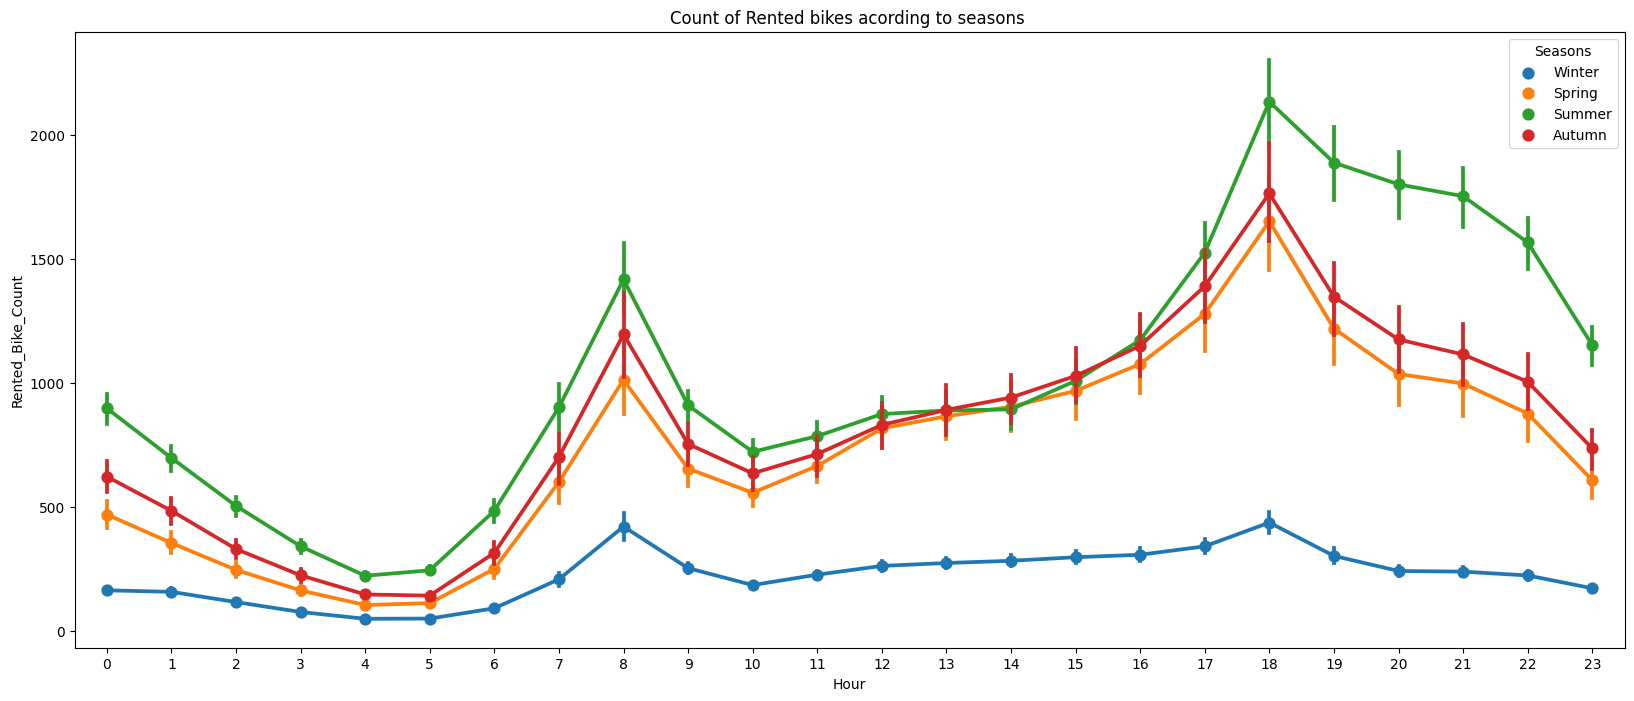

In [30]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

Interpretaion : In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that, In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm. In winter season the use of rented bike is very low because of snowfall.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

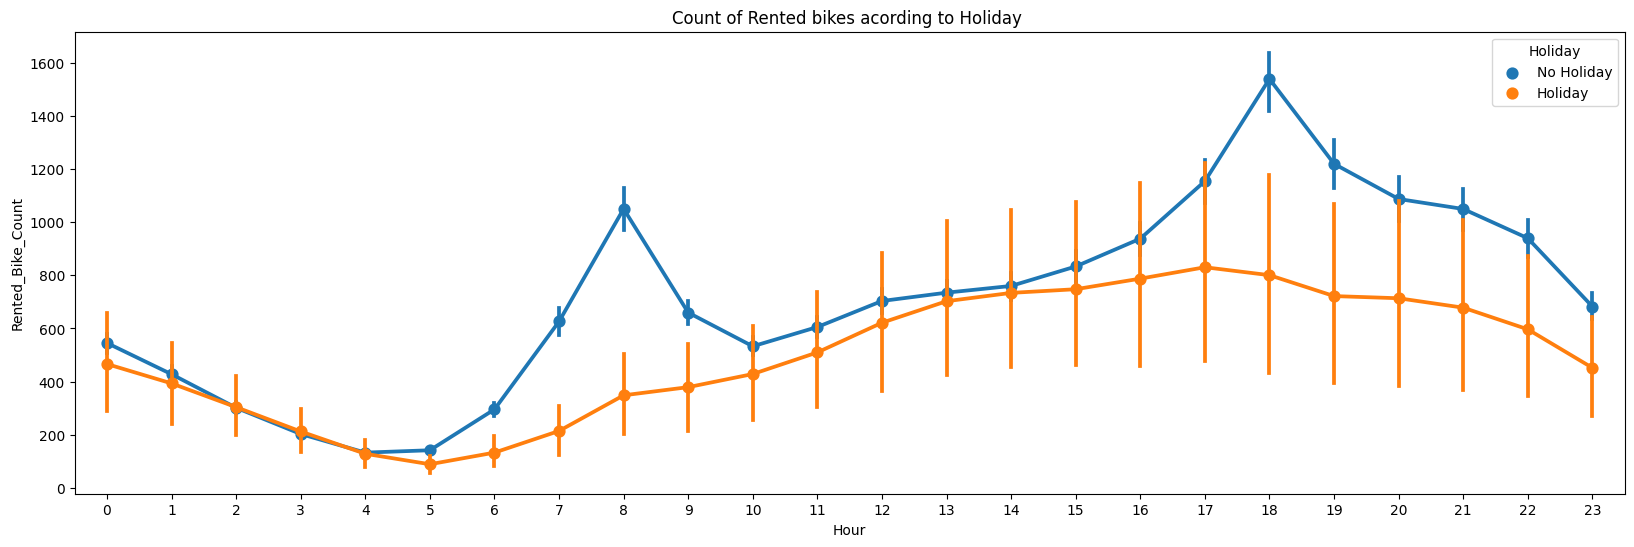

In [31]:
fig,ax=plt.subplots(figsize=(20,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

Interpretation : In the above point plot which shows the use of rented bike in a holiday, and it clearly shows that, plot shows that in holiday people uses the rented bike from 2pm-8pm

In [32]:
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

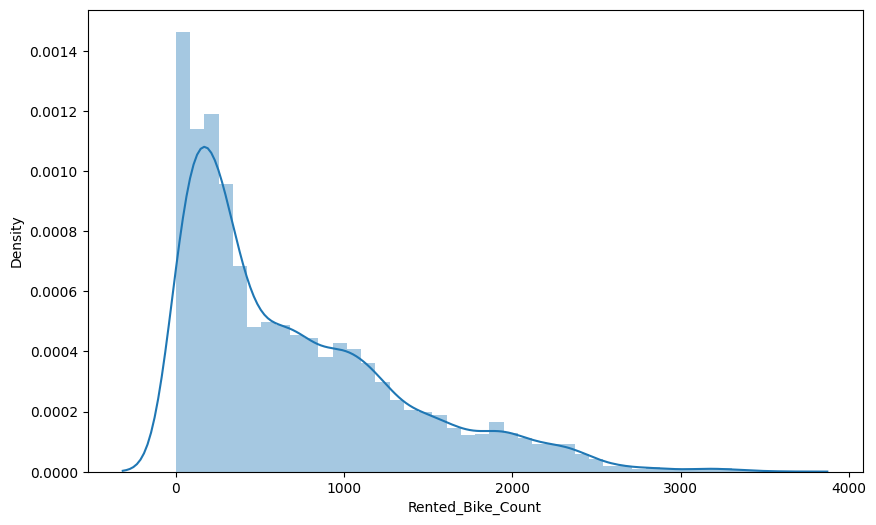

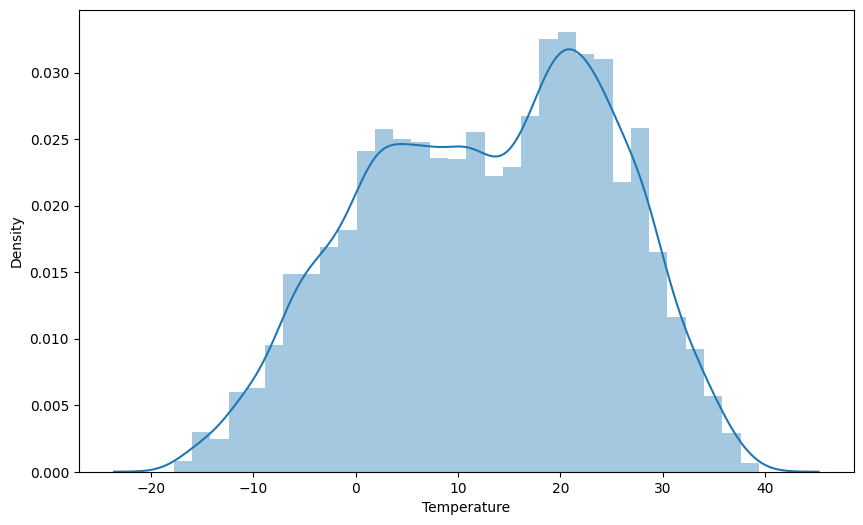

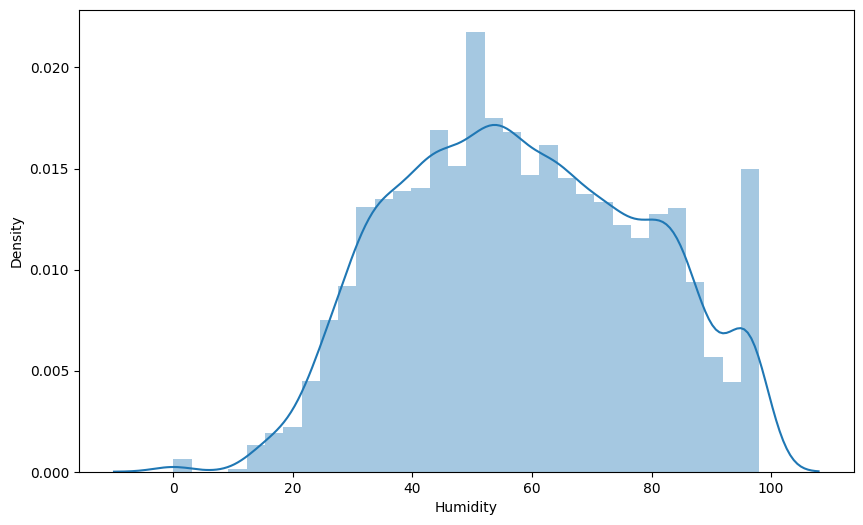

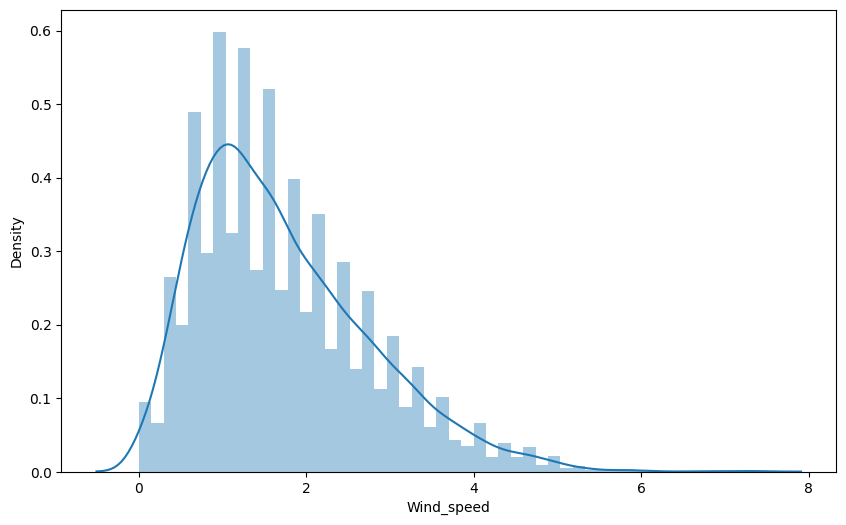

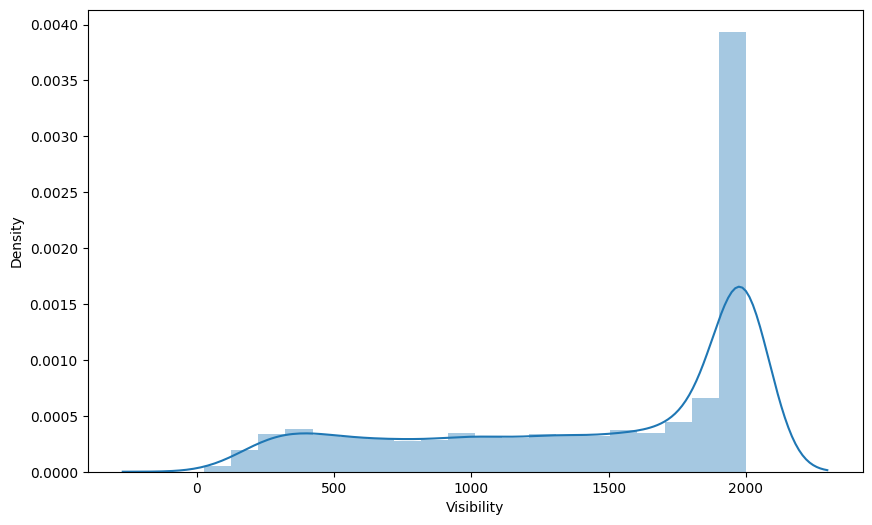

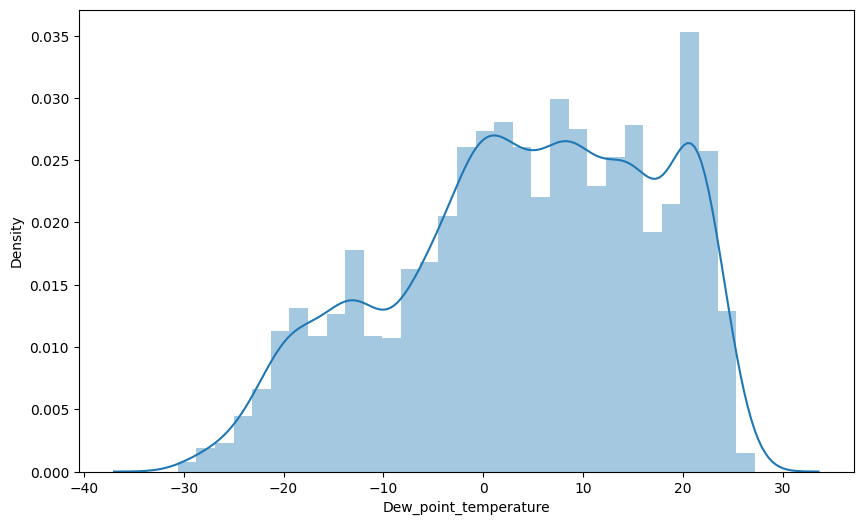

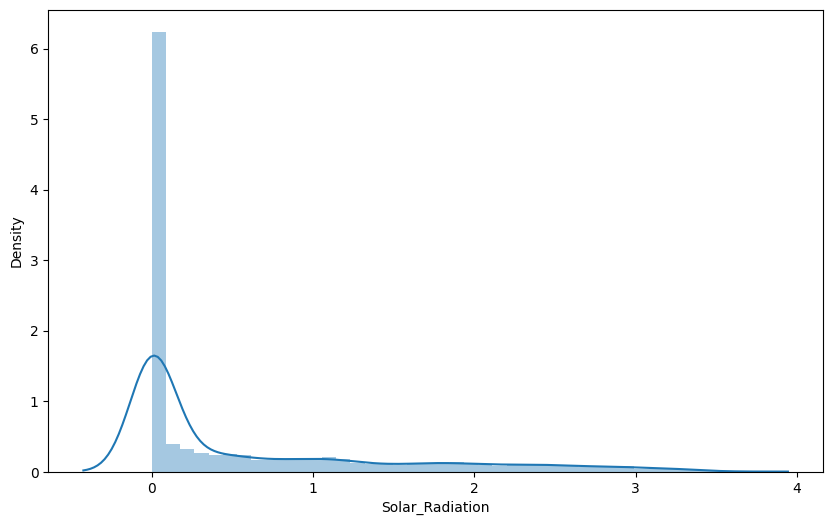

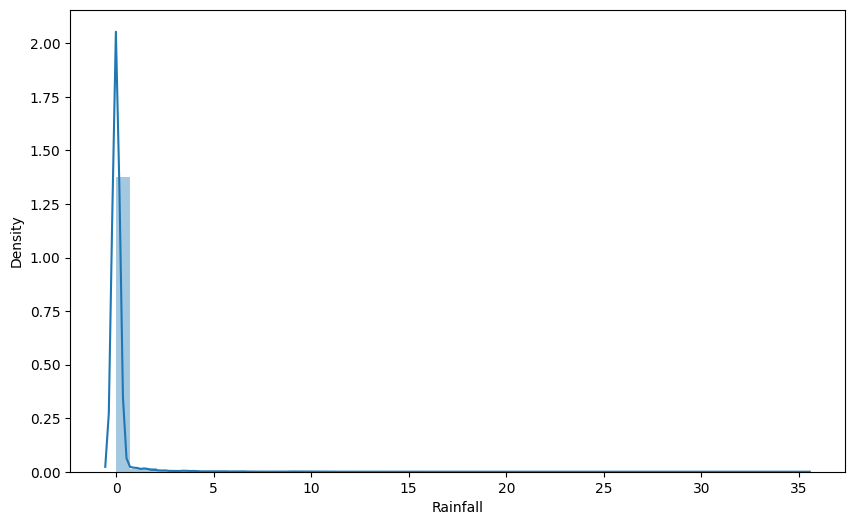

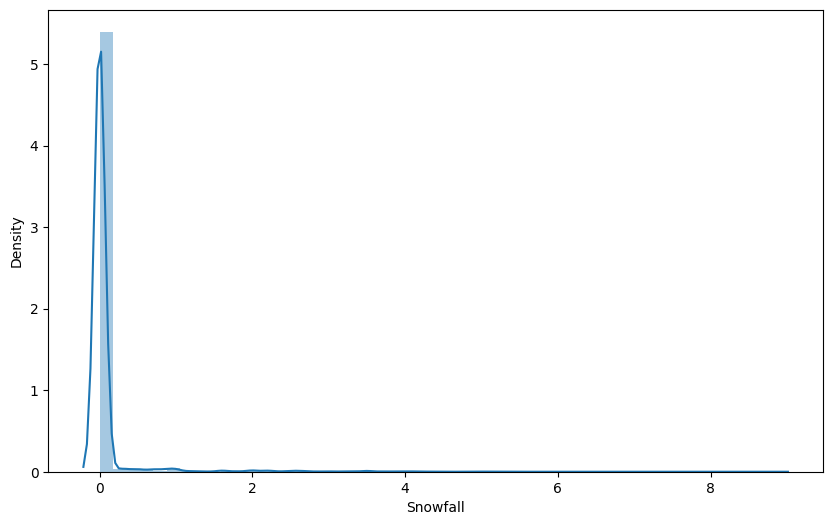

In [33]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

<Axes: xlabel='Temperature'>

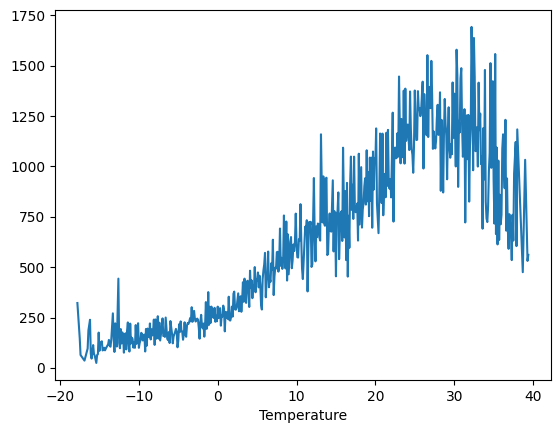

In [34]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

Interpretation : From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average.

<Axes: xlabel='Dew_point_temperature'>

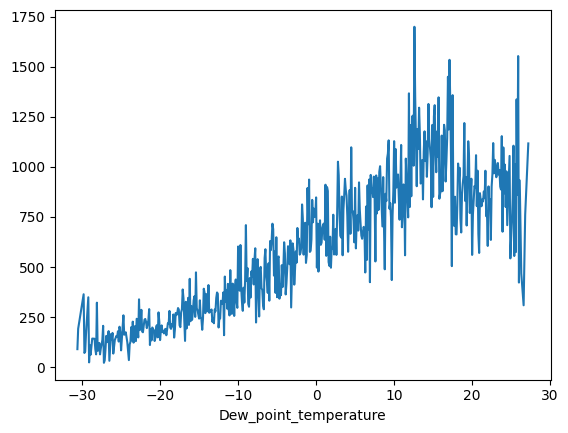

In [35]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Snowfall'>

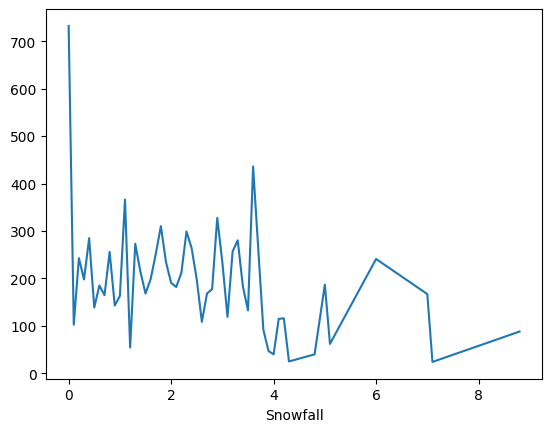

In [36]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

Interpretation : We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower.

<Axes: xlabel='Rainfall'>

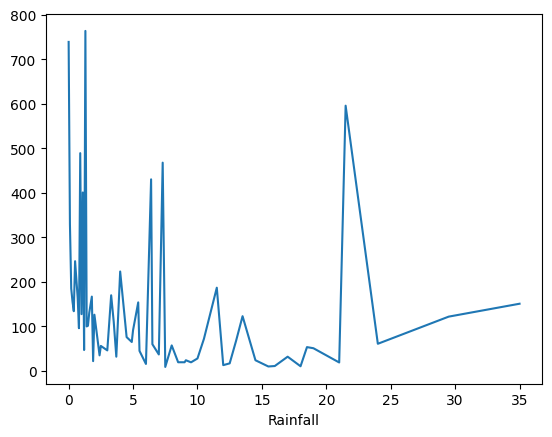

In [37]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

Interpretation : as seen, as the railfall increases there is decrease in demand, also , its highest when there is no or very less rainfall between 0-5cm.

<Axes: xlabel='Wind_speed'>

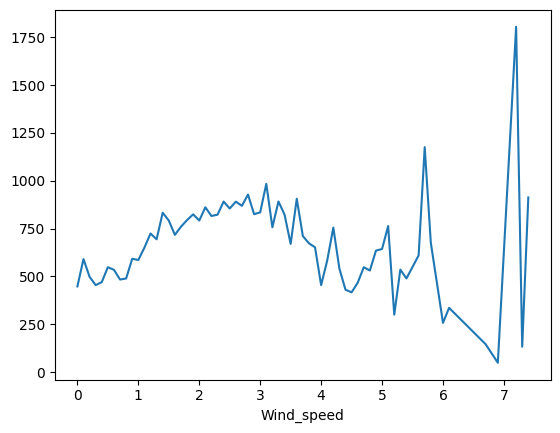

In [38]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

Interpretatin :We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increased.

REGRESSION ANALYSIS

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

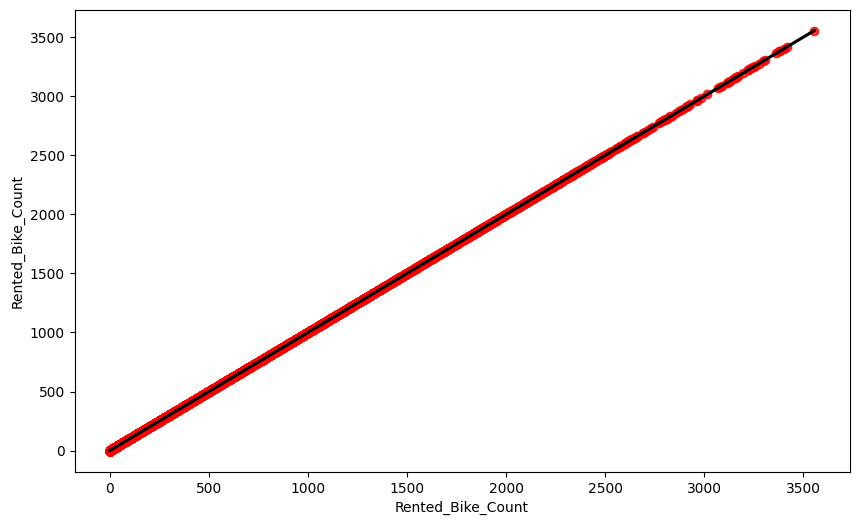

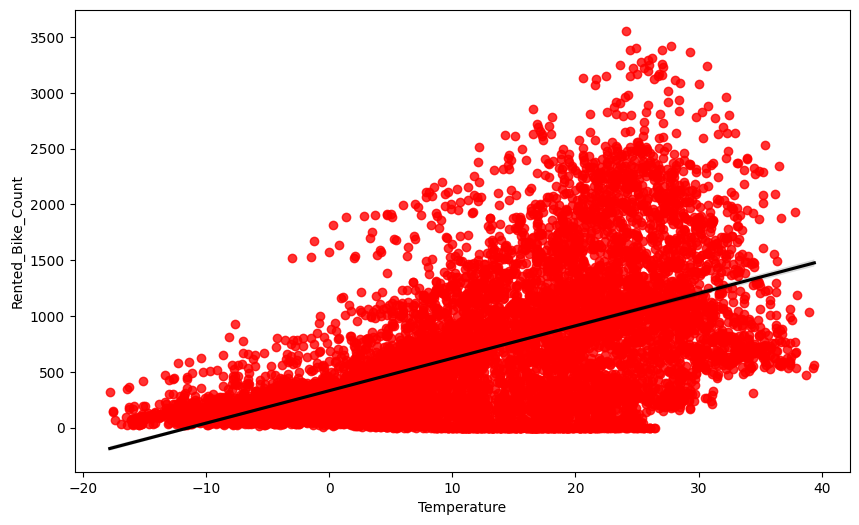

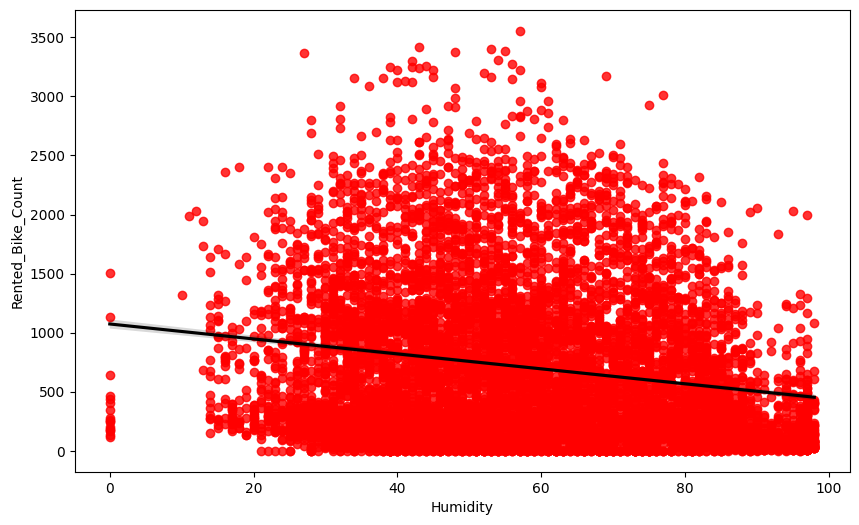

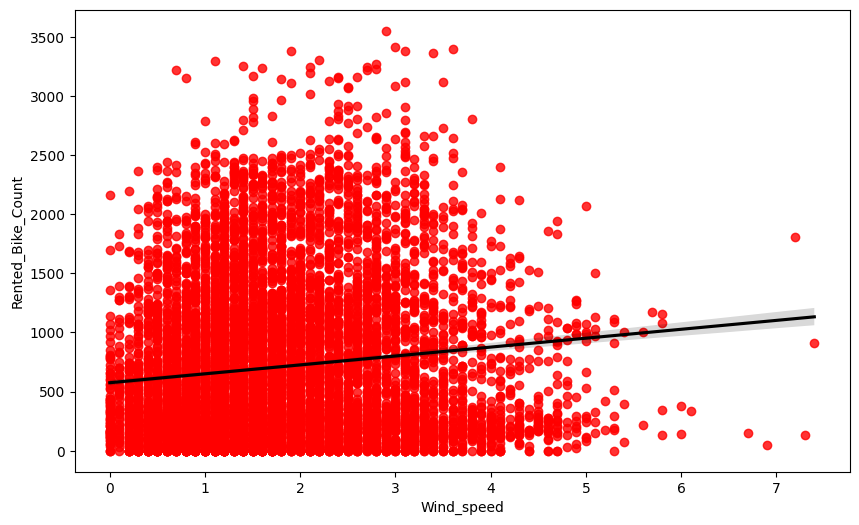

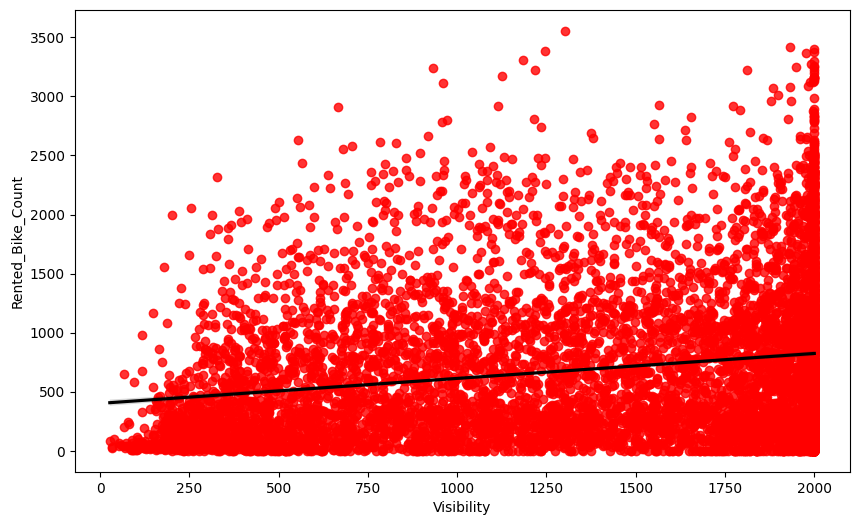

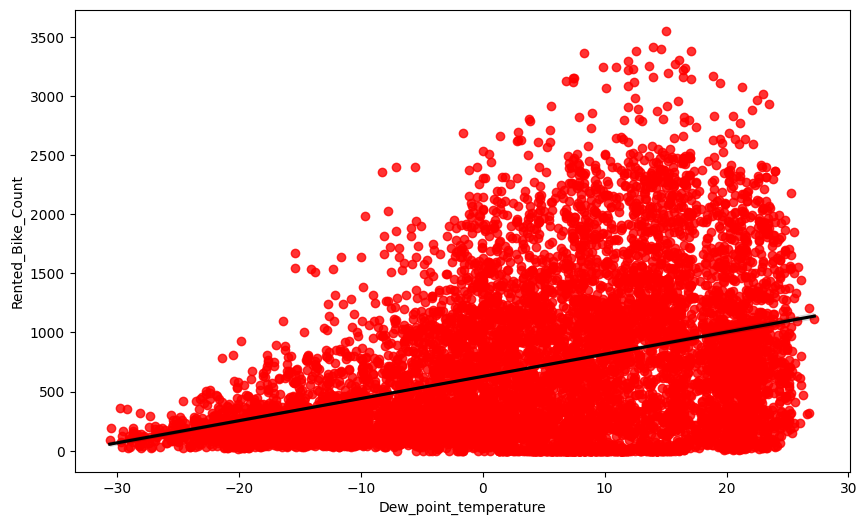

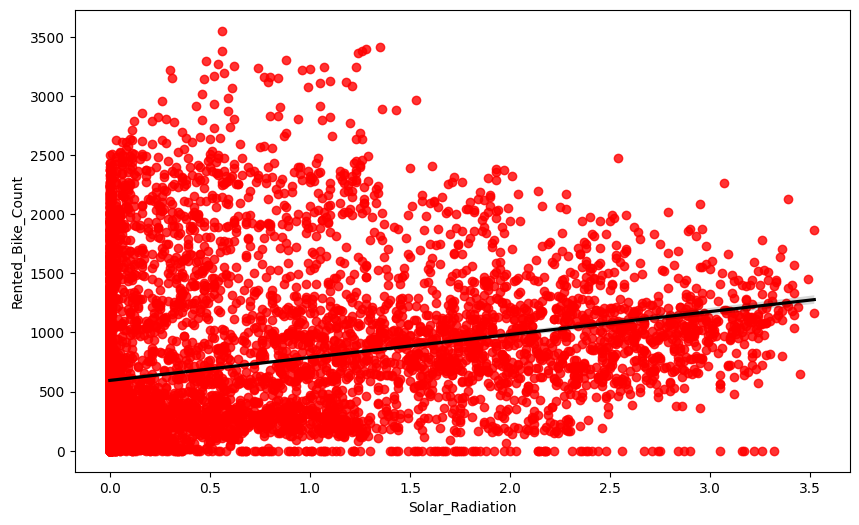

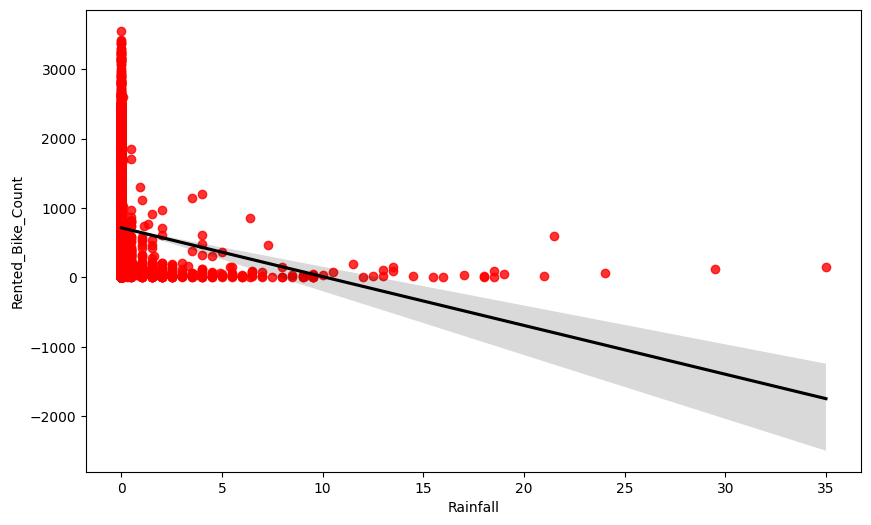

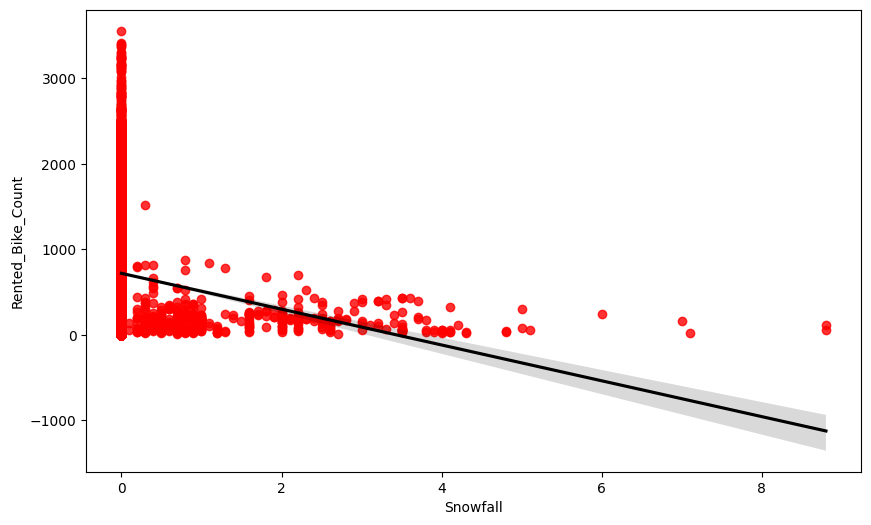

In [39]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'Red'}, line_kws={"color": "black"})

Interpretation : From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable. As seen , 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase

# Normalise Rented_Bike_Count column data

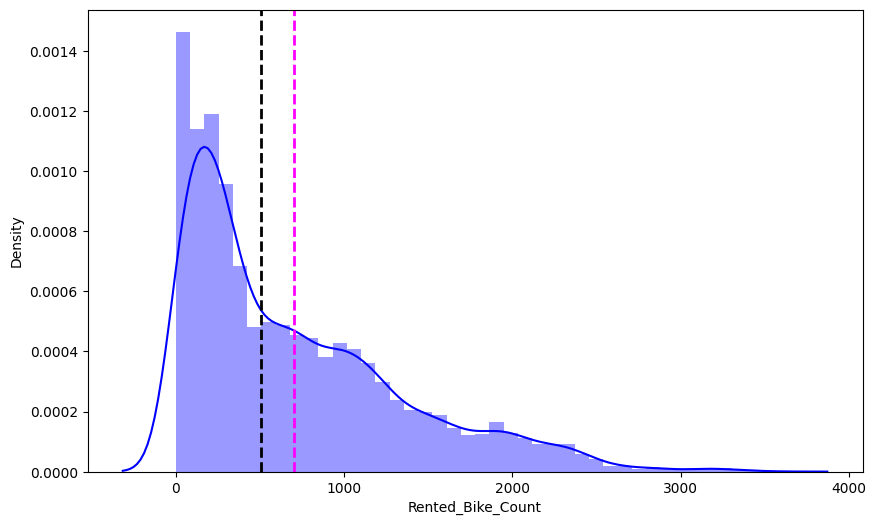

In [40]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="blue")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Interpretation : The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

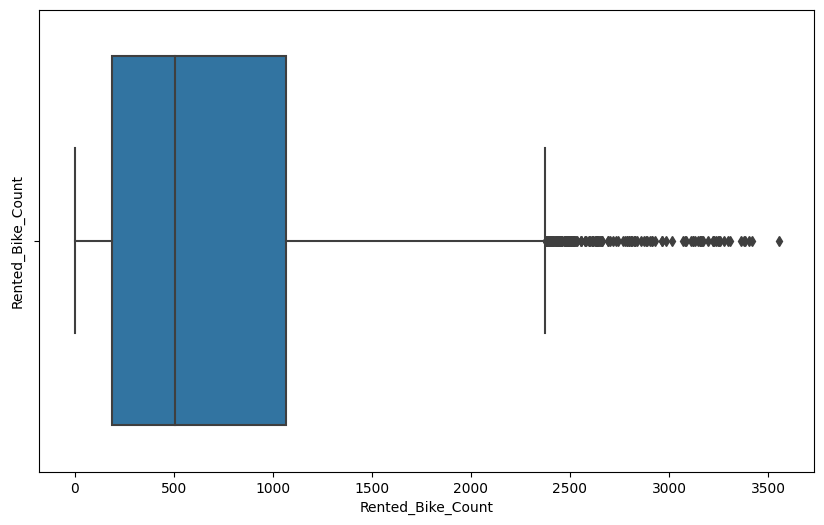

In [41]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

Interpretation : The above boxplot shows that we have detect outliers in Rented Bike Count column.

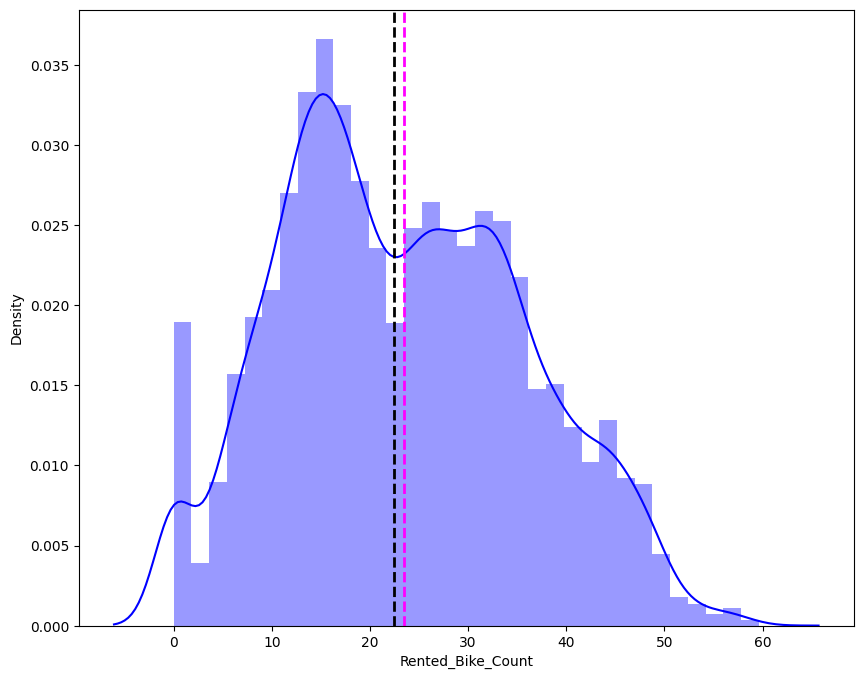

In [42]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="blue")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.



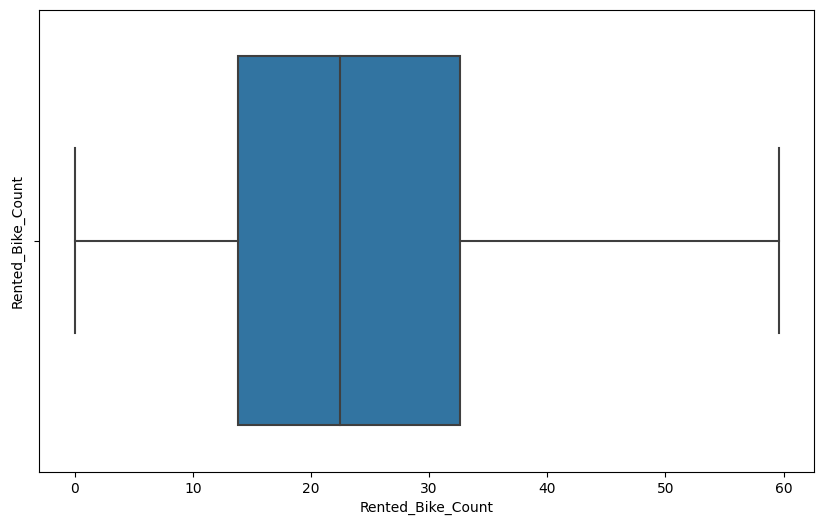

In [43]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# **Checking of Correlation between variables**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [44]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [45]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [46]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        10:43:45   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.R sqauare and Adj Square are near to each other. 40% of variance in the Rented
2.Bike count is explained by the model.
3.For F statistic , P value is less than 0.05 for 5% level of significance. P value of dew point temp and visibility are very high and they are not significant.

In [47]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# **Feature Engineering**

we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables

<Axes: >

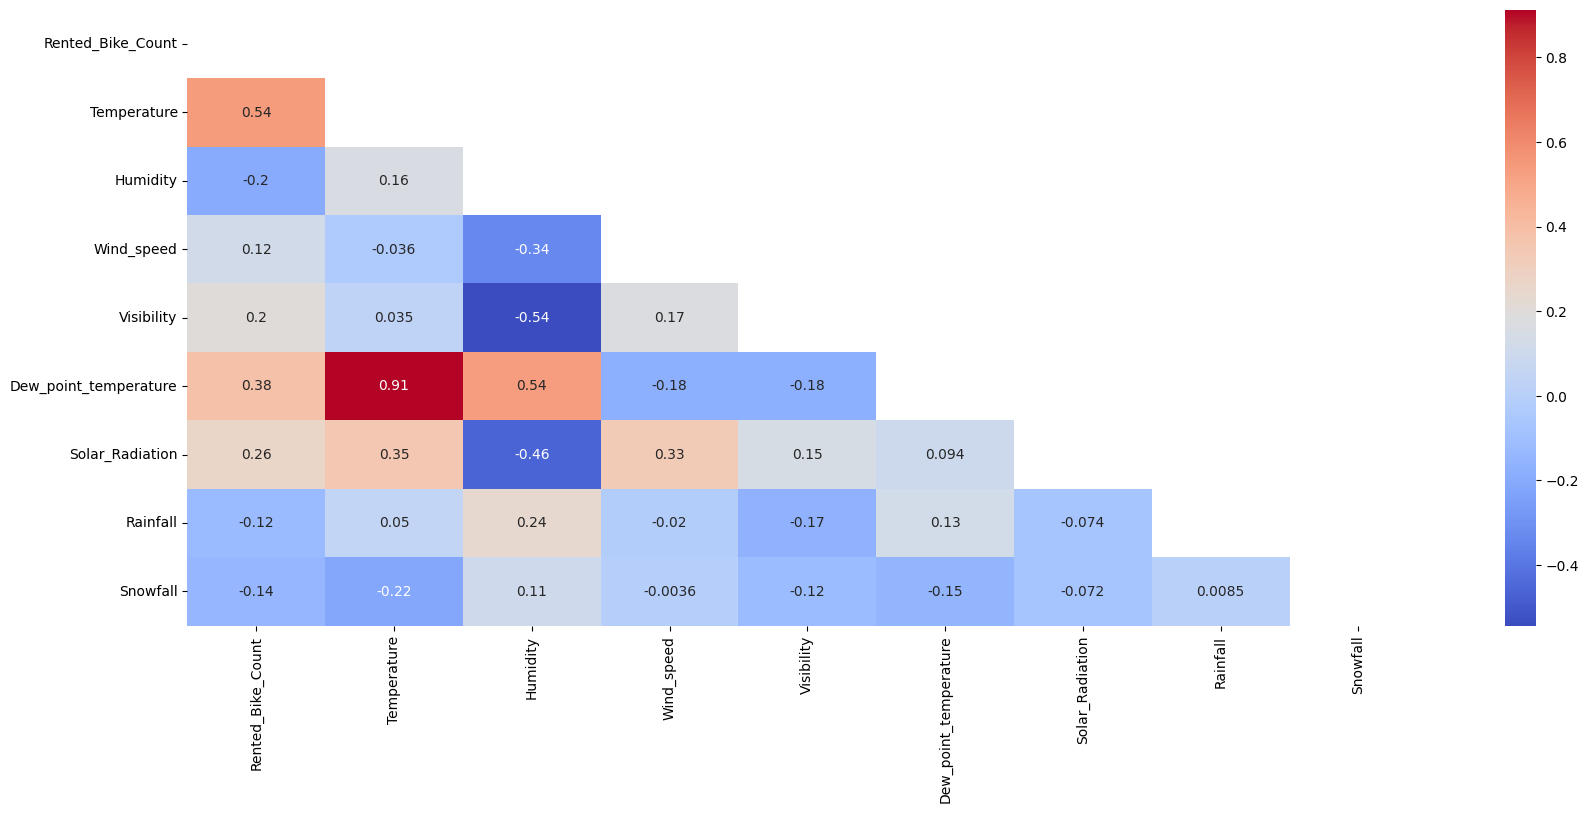

In [48]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

Interpretation : We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :

the temperature the dew point temperature the solar radiation And most negatively correlated variables are:

Humidity Rainfall From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.



In [49]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [50]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


# **Encoding**

A encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [52]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()       

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Feature Creation**

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [51]:
#Assign all catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# **Model Implementation**

Train Test split for regression

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library

In [53]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [54]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [56]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [57]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

# **Linear Regression**

Gradient descent is the process by which the algorithm tries to update the parameters using a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

No multicollinearity in the dataset.

Independent variables should show linear relationship with dv.

Residual mean should be 0 or close to 0.

There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

Let us now implement our first model. We will be using LinearRegression from scikit library

In [58]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [59]:
#check the score
reg.score(X_train, y_train)

0.7722101548255267

In [60]:
#check the coefficeint
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [61]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [62]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189293
RMSE : 5.9226271942350825
MAE : 4.474024092996784
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [63]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [64]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318178
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [65]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

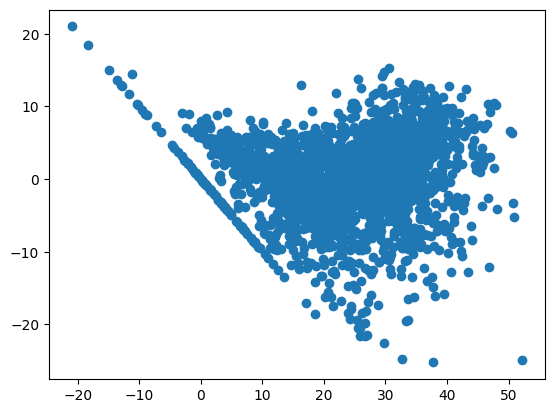

In [66]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

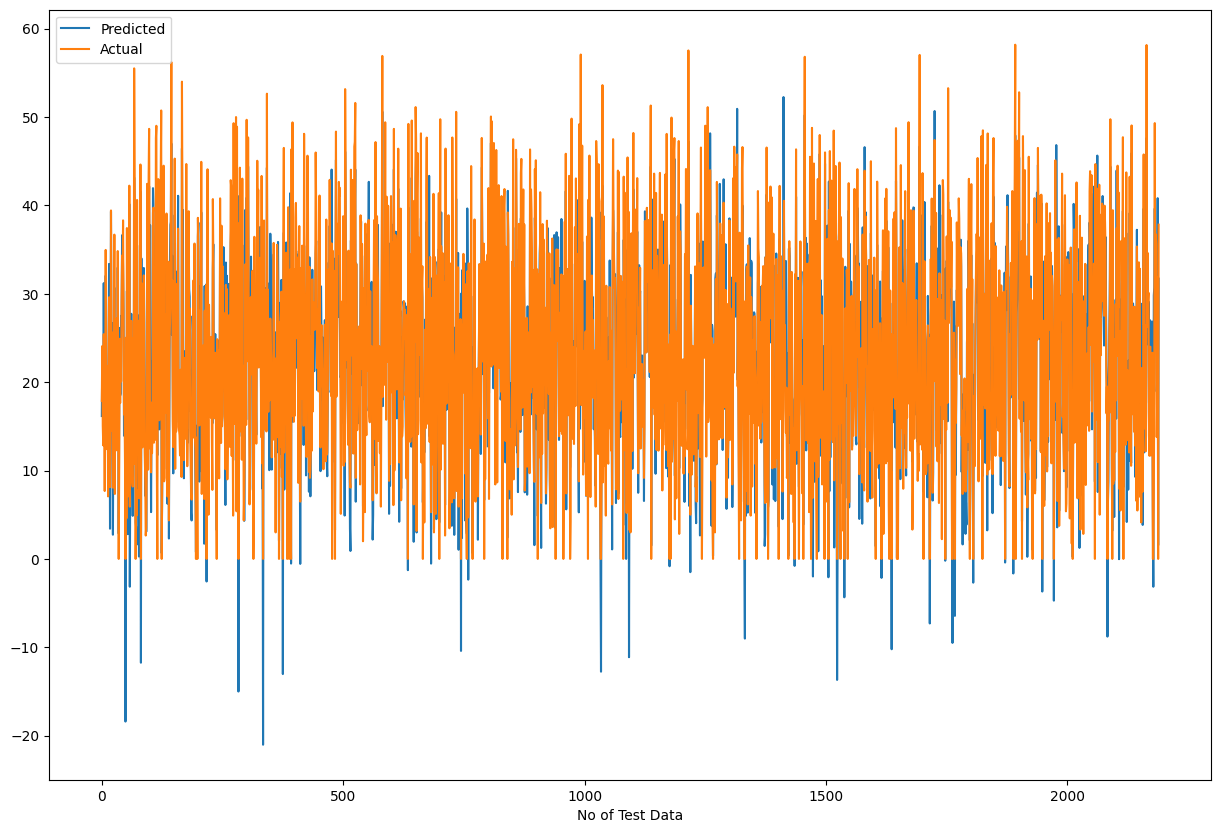

In [67]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION**

In [68]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3873692800799008 0.40519624904934015


In [69]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [71]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [72]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607


The r2_score for the test set is 0.38. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [73]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

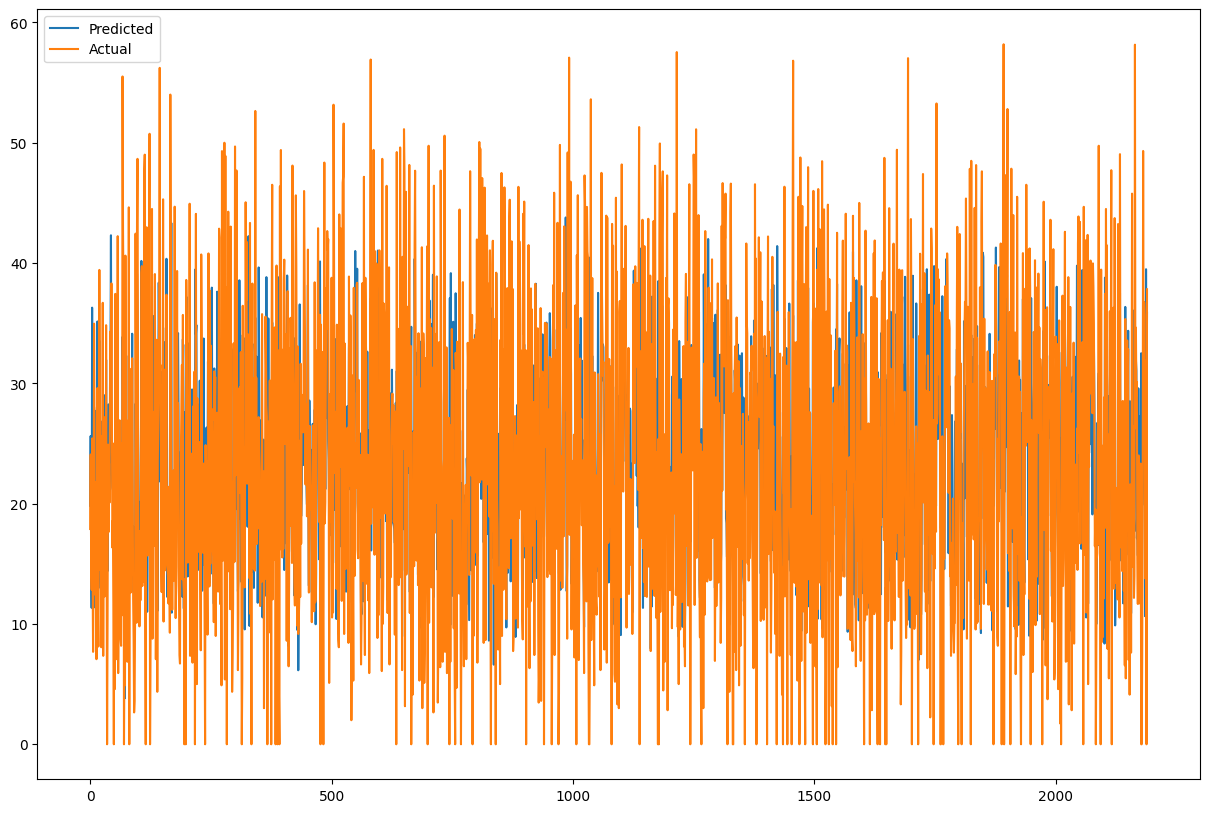

In [74]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


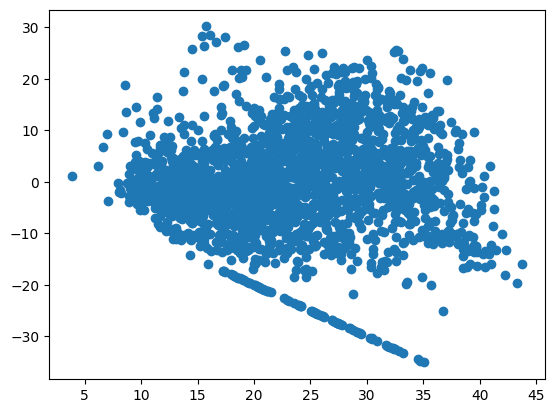

In [75]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# **RIDGE REGRESSION**

In [76]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [77]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [78]:
#check the score
ridge.score(X_train, y_train)

0.7722100789802107

In [79]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [80]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125379
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


Looks like our r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [81]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [82]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [83]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

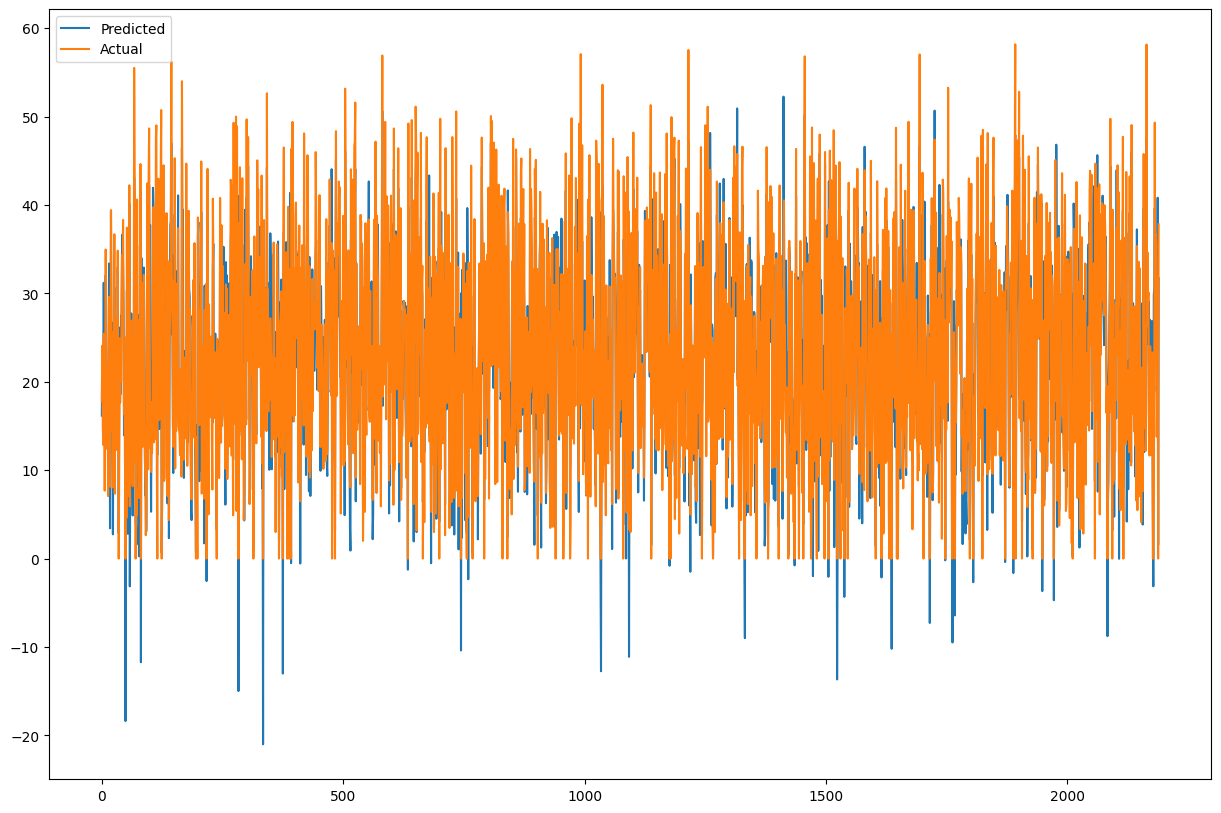

In [84]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

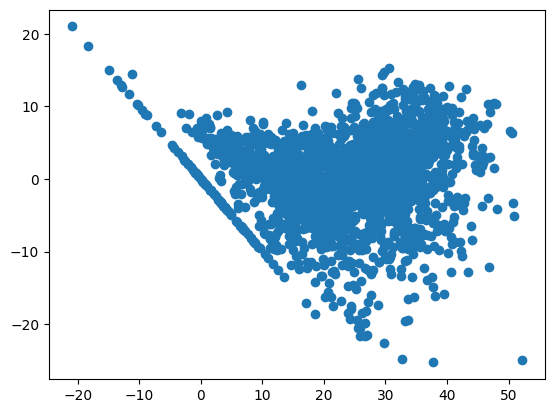

In [85]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **ELASTIC NET REGRESSION**

In [86]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [87]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [88]:
#check the score
elasticnet.score(X_train, y_train)

0.6261189054494012

In [89]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [90]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


r2 score value is 0.62 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [91]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [92]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.45120536350042
RMSE : 7.710460775044538
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


The r2_score for the test set is 0.86. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [93]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

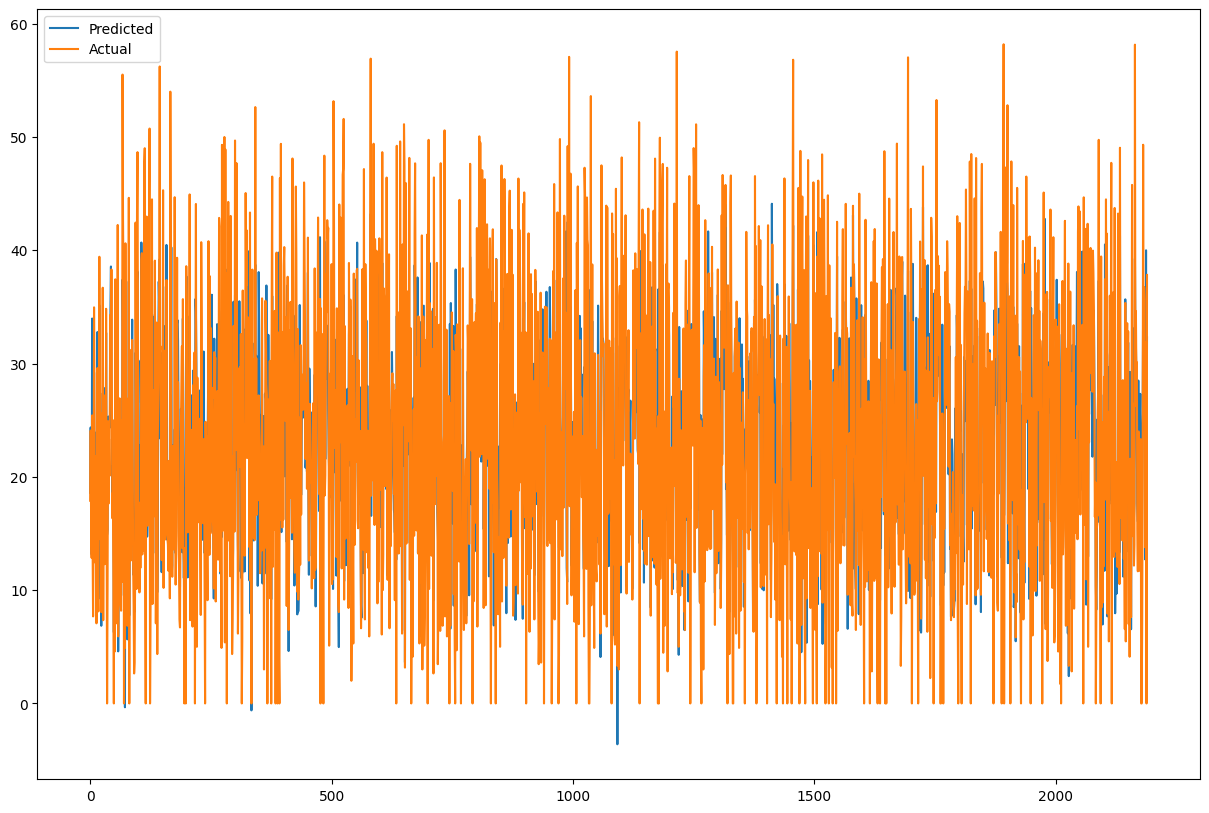

In [94]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

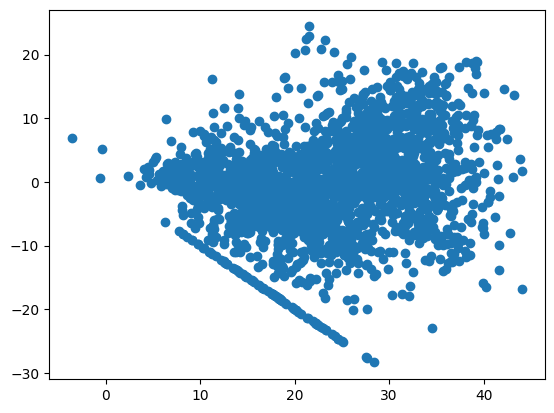

In [95]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))